# Plotting the Housing Data

A good first step when working with any new data set is to do some exploratory data analysis, starting with a plots of the data. Let's download the data. There is some information about the [data set](https://archive.ics.uci.edu/ml/datasets/Housing) at the UCI ML repository. It's a good idea to take a look at the dataset description before proceeding.

In [13]:
%matplotlib inline

# Download the data, save to a file called "housing.data"
import urllib
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
urllib.urlretrieve (data_url, "housing.data")

/Users/Mauve3/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


('housing.data', <httplib.HTTPMessage instance at 0x1143aeef0>)

The data file does not contain the column names in the first line, so we'll need to add those in manually. You can find the names and explanations [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). We've extracted the names below for convenience.

In [16]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
         "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

## Loading the Data

Now let's use pandas to load the data into a data frame. Note that the data is space separated (rather than the more common comma separated data). Here are the first few lines:

```
0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60
```

In [17]:
import pandas as pd

data = pd.read_csv("housing.data", header=None, names=names, delim_whitespace=True)

# Take a look at the first few rows
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Knowledge Check:

How many rows are in the dataset?

In [20]:
print len(data.columns)

14


## Plotting the Data

We are interested in the house values, given in column "MEDV" as a target for modeling. By plotting each of the other columns against "MEDV" we can get a sense of which variables may be correlated.

There are many ways we can plot the data, using `pandas`, `matplotlib`, or `seaborn`. In any case, it's nice to import `seaborn` for the improved styling. Let's try using `pandas` first to make a scatter plot of crime (column "CRIM") versus house value ("MEDV").

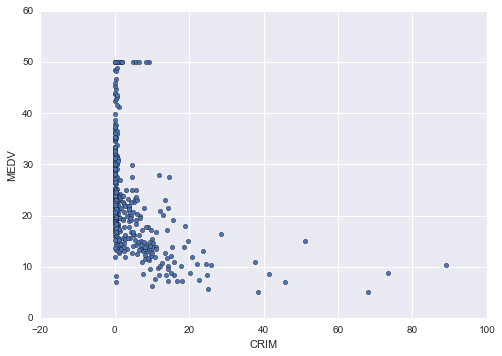

In [4]:
import seaborn as sns

# Plot using pandas
data.plot.scatter(x='CRIM', y='MEDV')

It looks like there is a relationship. While houses in low crime areas can have a wide range of values, houses in high crime areas appear to have lower values.

Knowledge checks:
* How do we select a column of data from a pandas DataFrame?
* Let's make the same plot with matplotlib.

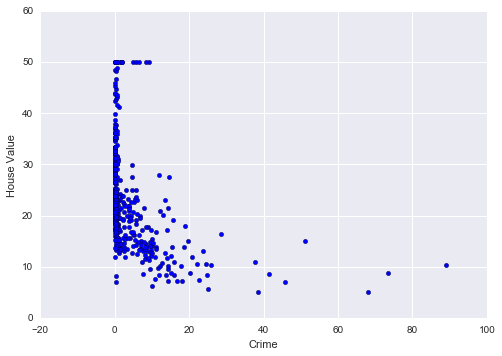

In [8]:
# Knowledge Check Solution
from matplotlib import pyplot as plt

# Plot using matplotlib
plt.scatter(data["CRIM"], data["MEDV"])
plt.xlabel("Crime")
plt.ylabel("House Value")

### Exercises

Exercise 1: Using `pandas` or `matplotlib` plot the remaining variables against "MEDV" and discuss the relationships you find. Question: Which variables seem to correlate well?

### Bonus Exercises

Exercise 2: Seaborn is very handy for making plots of data for exploratory purposes. Try using `seaborn`'s [pairplots](https://stanford.edu/~mwaskom/software/seaborn/examples/scatterplot_matrix.html) to make similar plots.

Exercise 3: Improve your plots by including units and better axis labels. You'll need to read the [data set description](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

Exercise 4: Can you find any visual correlations between two variables other than MEDV?

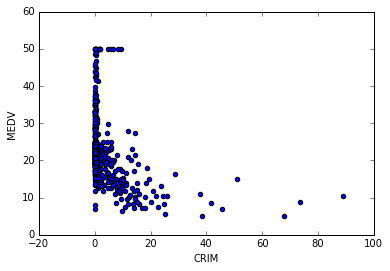

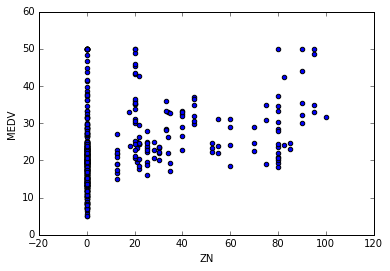

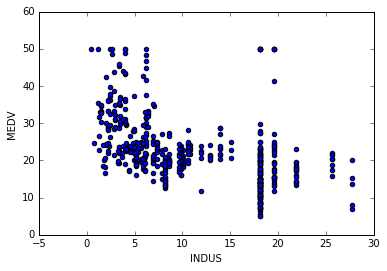

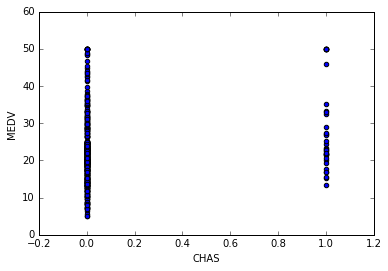

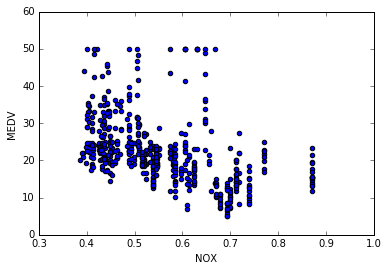

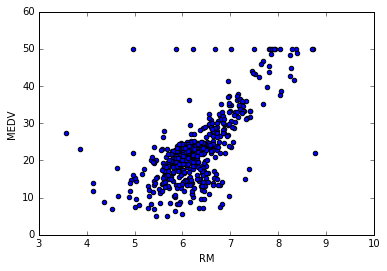

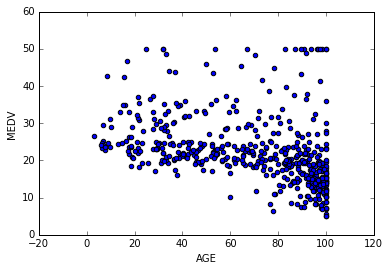

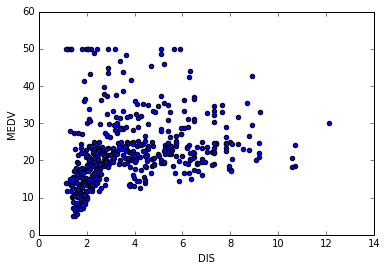

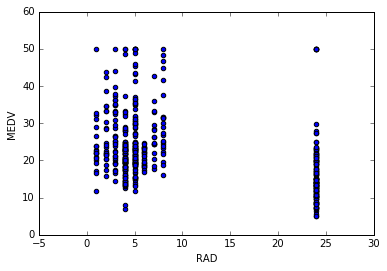

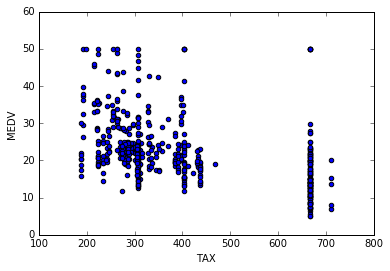

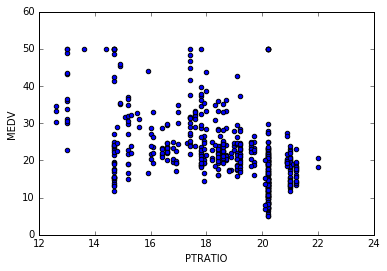

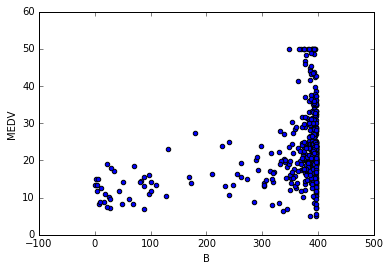

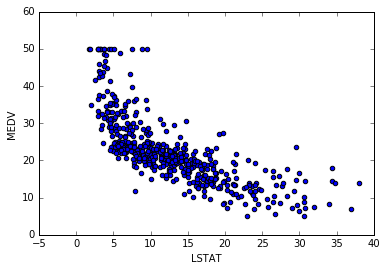

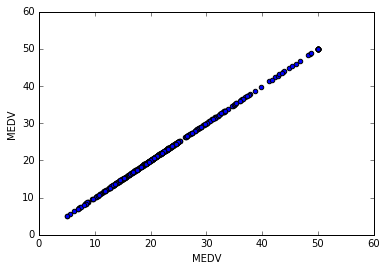

In [21]:
for name in names:
    data.plot.scatter(x=name, y='MEDV')

Bonus Exercises
Exercise 2: Seaborn is very handy for making plots of data for exploratory purposes. Try using seaborn's pairplots to make similar plots.

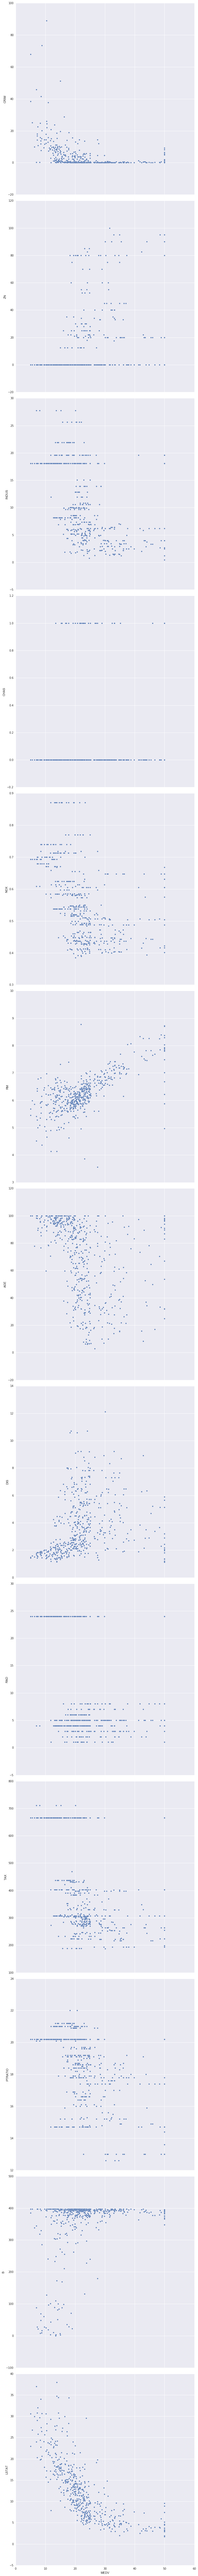

In [25]:
import seaborn as sns
ax = sns.pairplot(y_vars=names[:-1], x_vars=["MEDV"], data=data, size=10)

Exercise 3: Improve your plots by including units and better axis labels. You'll need to read the data set description.

In [27]:
ax.set(xlabel='common xlabel', ylabel='common ylabel')

Exercise 4: Can you find any visual correlations between two variables other than MEDV?

In [32]:
data.groupby('CRIM').describe()
#sns.pairplot(data,hue="CRIM", size=5)

AGE       B  CHAS     DIS  INDUS  LSTAT  MEDV    NOX  \
CRIM                                                                     
0.00632  count    1.0    1.00   1.0  1.0000   1.00   1.00   1.0  1.000   
         mean    65.2  396.90   0.0  4.0900   2.31   4.98  24.0  0.538   
         std      NaN     NaN   NaN     NaN    NaN    NaN   NaN    NaN   
         min     65.2  396.90   0.0  4.0900   2.31   4.98  24.0  0.538   
         25%     65.2  396.90   0.0  4.0900   2.31   4.98  24.0  0.538   
         50%     65.2  396.90   0.0  4.0900   2.31   4.98  24.0  0.538   
         75%     65.2  396.90   0.0  4.0900   2.31   4.98  24.0  0.538   
         max     65.2  396.90   0.0  4.0900   2.31   4.98  24.0  0.538   
0.00906  count    1.0    1.00   1.0  1.0000   1.00   1.00   1.0  1.000   
         mean    20.8  394.72   0.0  7.3073   2.97   7.85  32.2  0.400   
         std      NaN     NaN   NaN     NaN    NaN    NaN   NaN    NaN   
         min     20.8  394.72   0.0  7.3073   2.97   7.85  32.2  0.400   
         25%     20.8  394.72   0.0  7.3073   2.97   7.85  32.2  0.400   
         50%     20.8  394.72   0.0  7.3073   2.97   7.85  32.2  0.400   
         75%     20.8  394.72   0.0  7.3073   2.97   7.85  32.2  0.400   
         max     20.8  394.72   0.0  7.3073   2.97   7.85  32.2  0.400   
0.01096  count    1.0    1.00   1.0  1.0000   1.00   1.00   1.0  1.000   
         mean    31.9  394.72   0.0  7.3073   2.25   8.23  22.0  0.389   
         std      NaN     NaN   NaN     NaN    NaN    NaN   NaN    NaN   
         min     31.9  394.72   0.0  7.3073   2.25   8.23  22.0  0.389   
         25%     31.9  394.72   0.0  7.3073   2.25   8.23  22.0  0.389   
         50%     31.9  394.72   0.0  7.3073   2.25   8.23  22.0  0.389   
         75%     31.9  394.72   0.0  7.3073   2.25   8.23  22.0  0.389   
         max     31.9  394.72   0.0  7.3073   2.25   8.23  22.0  0.389   
0.01301  count    1.0    1.00   1.0  1.0000   1.00   1.00   1.0  1.000   
         mean    49.3  394.74   0.0  7.0379   1.52   5.49  32.7  0.442   
         std      NaN     NaN   NaN     NaN    NaN    NaN   NaN    NaN   
         min     49.3  394.74   0.0  7.0379   1.52   5.49  32.7  0.442   
         25%     49.3  394.74   0.0  7.0379   1.52   5.49  32.7  0.442   
         50%     49.3  394.74   0.0  7.0379   1.52   5.49  32.7  0.442   
...               ...     ...   ...     ...    ...    ...   ...    ...   
51.13580 std      NaN     NaN   NaN     NaN    NaN    NaN   NaN    NaN   
         min    100.0    2.60   0.0  1.4130  18.10  10.11  15.0  0.597   
         25%    100.0    2.60   0.0  1.4130  18.10  10.11  15.0  0.597   
         50%    100.0    2.60   0.0  1.4130  18.10  10.11  15.0  0.597   
         75%    100.0    2.60   0.0  1.4130  18.10  10.11  15.0  0.597   
         max    100.0    2.60   0.0  1.4130  18.10  10.11  15.0  0.597   
67.92080 count    1.0    1.00   1.0  1.0000   1.00   1.00   1.0  1.000   
         mean   100.0  384.97   0.0  1.4254  18.10  22.98   5.0  0.693   
         std      NaN     NaN   NaN     NaN    NaN    NaN   NaN    NaN   
         min    100.0  384.97   0.0  1.4254  18.10  22.98   5.0  0.693   
         25%    100.0  384.97   0.0  1.4254  18.10  22.98   5.0  0.693   
         50%    100.0  384.97   0.0  1.4254  18.10  22.98   5.0  0.693   
         75%    100.0  384.97   0.0  1.4254  18.10  22.98   5.0  0.693   
         max    100.0  384.97   0.0  1.4254  18.10  22.98   5.0  0.693   
73.53410 count    1.0    1.00   1.0  1.0000   1.00   1.00   1.0  1.000   
         mean   100.0   16.45   0.0  1.8026  18.10  20.62   8.8  0.679   
         std      NaN     NaN   NaN     NaN    NaN    NaN   NaN    NaN   
         min    100.0   16.45   0.0  1.8026  18.10  20.62   8.8  0.679   
         25%    100.0   16.45   0.0  1.8026  18.10  20.62   8.8  0.679   
         50%    100.0   16.45   0.0  1.8026  18.10  20.62   8.8  0.679   
         75%    100.0   16.45   0.0  1.8026  18.10  20.62   8.8  0.679   
         max    100.0 

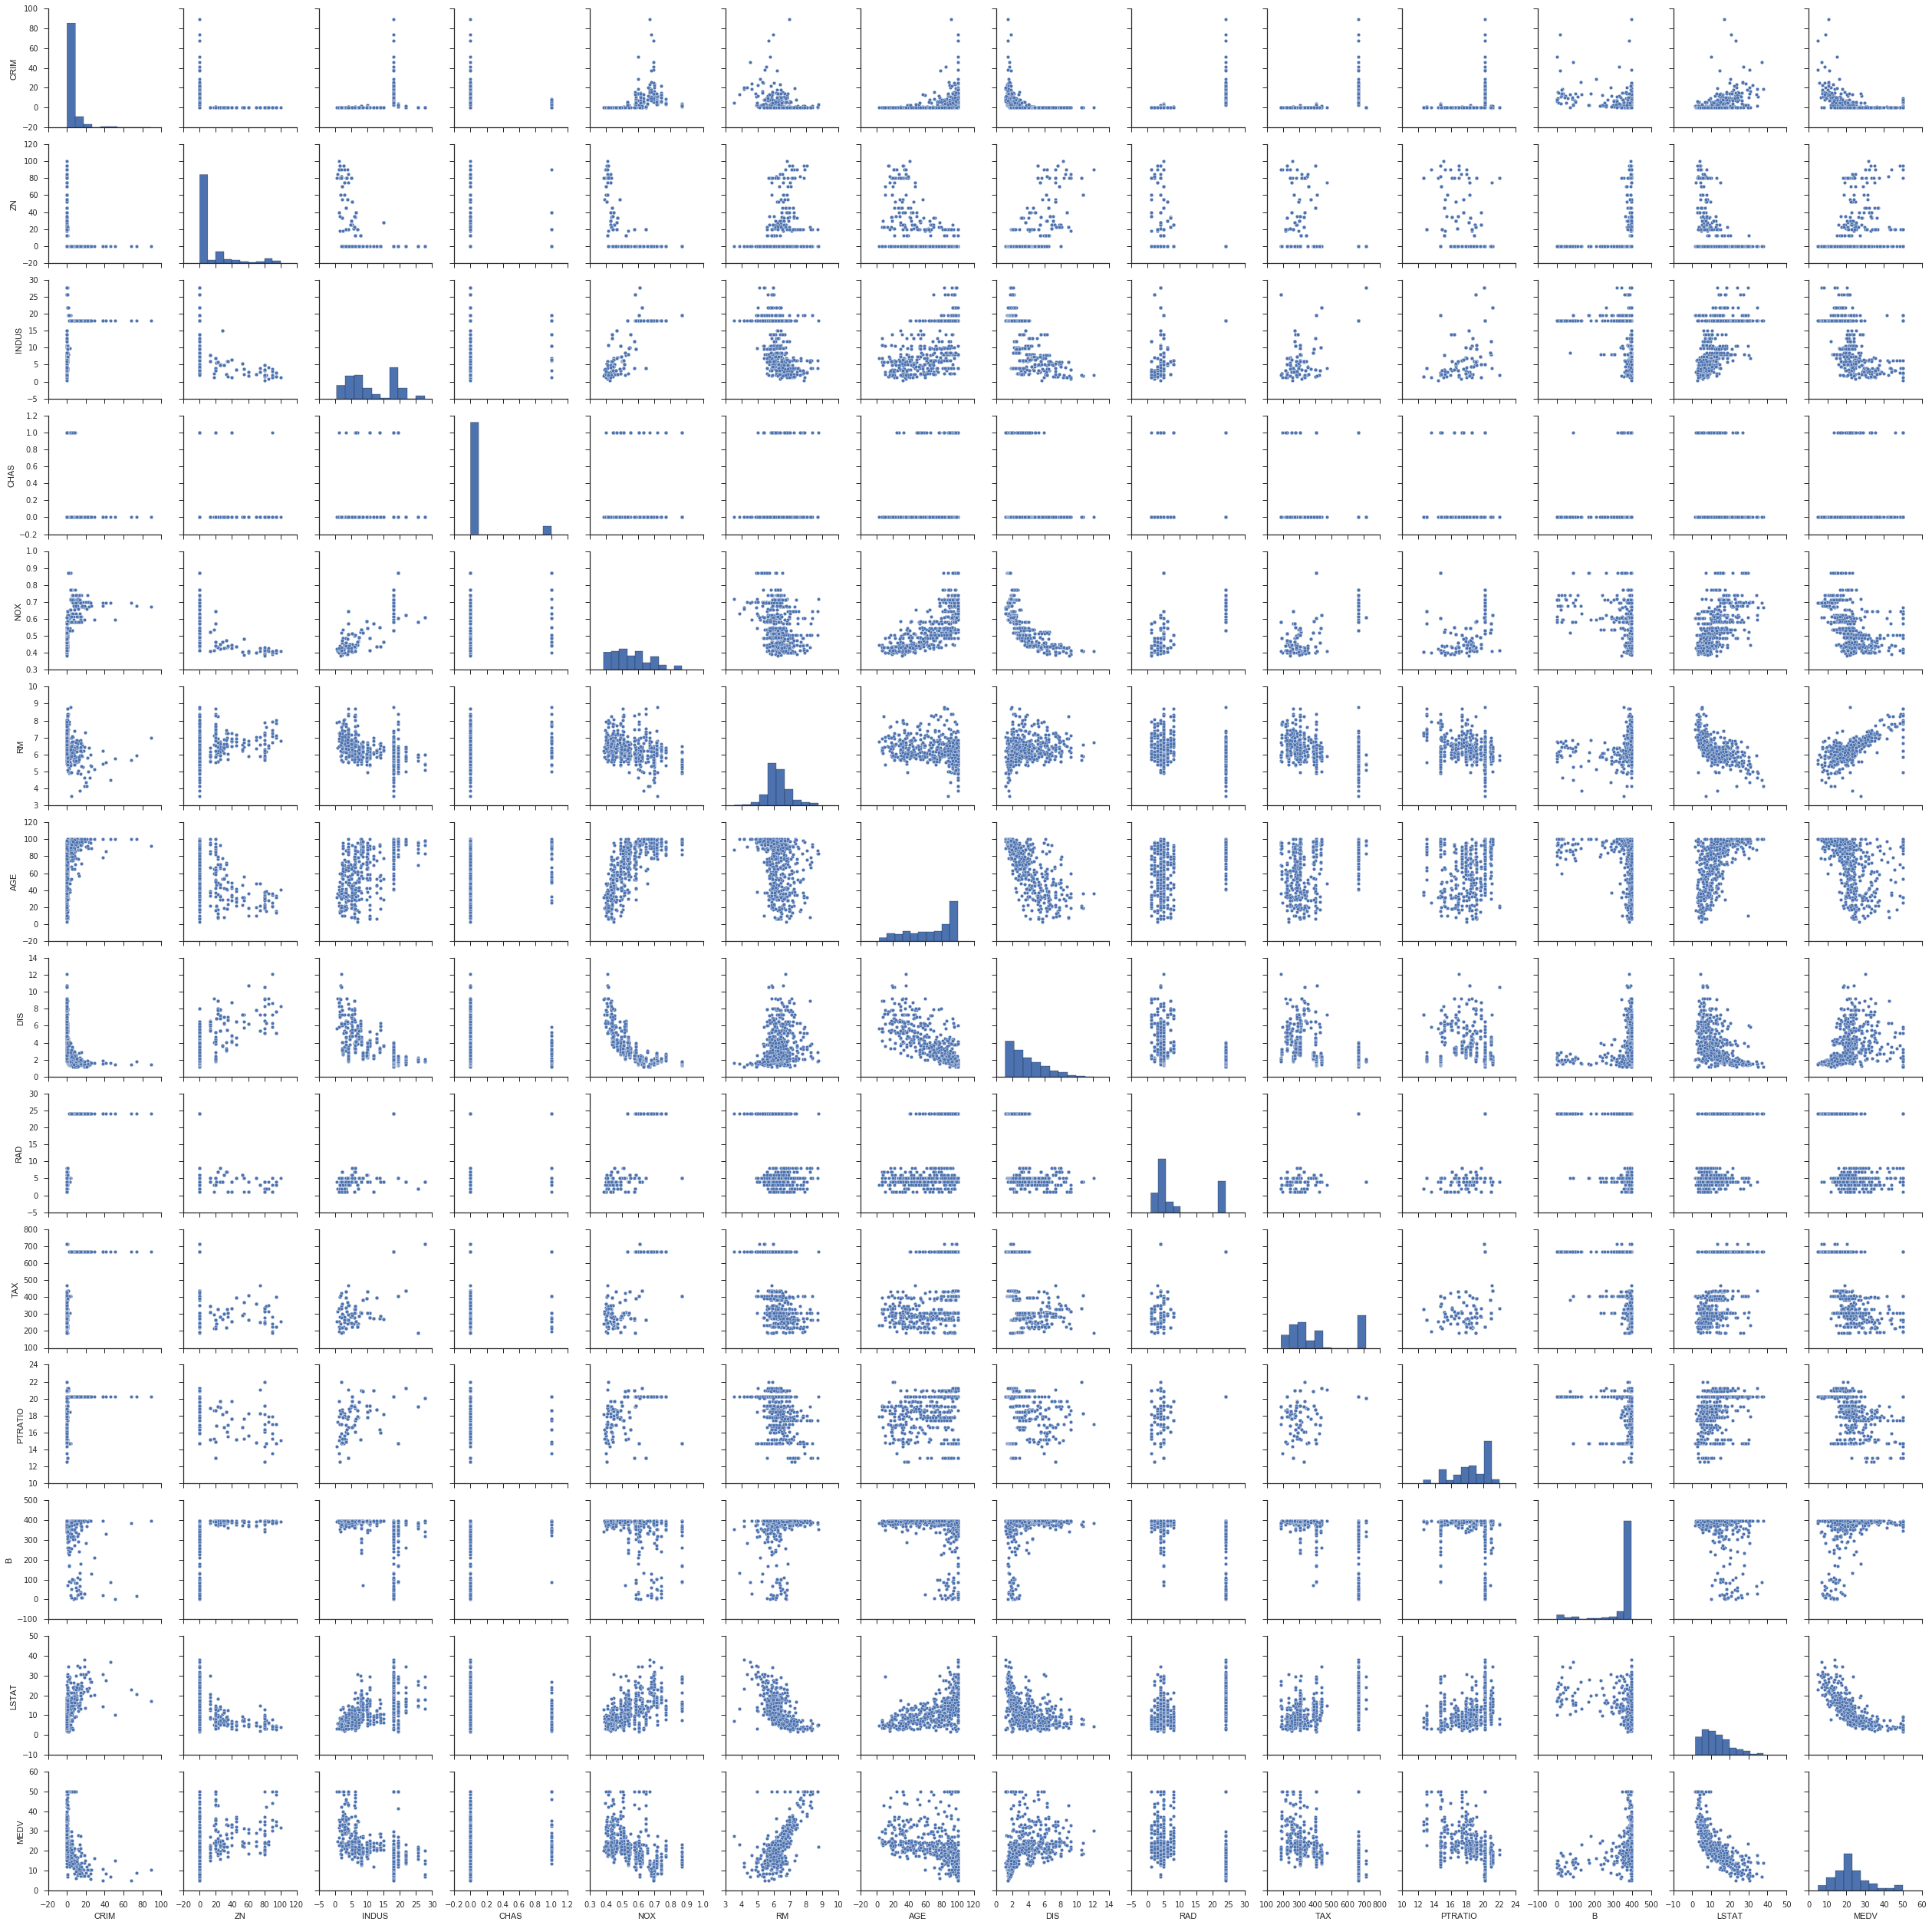

In [34]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)